# Exploratory Data Analysis (EDA)

## 1. Introduction
- Purpose of EDA

    The purpose of this exploratory data analysis (EDA) is to understand the key
    characteristics of the motor vehicle insurance dataset and identify factors
    that may influence insurance premium pricing. This analysis aims to support
    subsequent data preparation and modeling decisions.

- Key business questions

    This EDA focuses on addressing the following business-driven questions:
    - Which customer or vehicle-related factors are most strongly associated with
    insurance premium amounts?
    - How do claim history indicators relate to premium pricing?
    - Are there data quality or missing value issues that may impact modeling?

## 2. Dataset Overview
- Dataset size and structure
- Feature categories (customer, policy, vehicle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization settings
plt.style.use("seaborn-v0_8")

In [2]:
import sys
print(sys.executable)
print(sys.version)

/usr/local/bin/python3.11
3.11.2 (v3.11.2:878ead1ac1, Feb  7 2023, 10:02:41) [Clang 13.0.0 (clang-1300.0.29.30)]


In [3]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip3.11 install --upgrade pip


In [4]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [5]:
import sys
print(sys.executable)
print(sys.version)

/usr/local/bin/python3.11
3.11.2 (v3.11.2:878ead1ac1, Feb  7 2023, 10:02:41) [Clang 13.0.0 (clang-1300.0.29.30)]


In [6]:
train_path = "../data/car_insurance_premium_training.csv"

df = pd.read_csv(train_path)

In [7]:
# Basic overview
df.shape

(32136, 40)

In [8]:
# NOTE:
# df.head() is intentionally commented out to avoid exposing PII.
# Data inspection is performed using aggregated statistics only.
# df.head()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          32136 non-null  object 
 1   prefix                               21345 non-null  object 
 2   first_name                           32136 non-null  object 
 3   last_name                            32116 non-null  object 
 4   gender                               32136 non-null  object 
 5   birth_date                           32136 non-null  object 
 6   driving_license_date                 32136 non-null  object 
 7   phone_number                         32136 non-null  object 
 8   email                                32136 non-null  object 
 9   secondary_address                    32136 non-null  object 
 10  building_number                      32136 non-null  int64  
 11  street_name                 

In [10]:
df.describe()

,building_number,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,...,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_length,vehicle_weight
count,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,...,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,31451.000000,32136.000000
mean,185.629792,5.896596,1.443055,1.796023,1.048015,0.391804,0.361433,579.367438,104.826855,0.206622,...,0.463897,2.839806,0.119461,2004.573376,97.543409,1717.529842,18972.391870,4.404998,4.251559,1252.991349
std,280.506483,5.909002,0.943590,1.157598,0.231683,0.550027,0.480423,44.991023,1110.840111,0.771437,...,0.774516,0.396159,0.324335,5.347809,28.174377,409.694777,7176.732691,0.976780,0.378661,274.112493
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,460.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1954.000000,0.000000,49.000000,270.460000,0.000000,2.500000,55.000000
25%,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,542.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2001.000000,75.000000,1461.000000,14093.730000,4.000000,4.015000,1089.000000
50%,45.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,575.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2004.000000,95.000000,1749.000000,18020.000000,5.000000,4.227000,1239.000000
75%,255.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,614.000000,0.000000,0.000000,...,0.660000,3.000000,0.000000,2007.000000,110.000000,1952.000000,22466.050000,5.000000,4.454000,1395.000000
max,999.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,676.000000,128809.730000,15.000000,...,20.860000,3.000000,1.000000,2018.000000,340.000000,5654.000000,110000.000000,6.000000,8.218000,2725.000000


**Dataset Overview Summary**

- The dataset contains approximately 32136 records and 40 features.
- The target variable is `net_premium_amount`, representing the annual insurance premium.
- The dataset includes a mix of numerical, categorical, and date-related features related to customers, policies, and vehicles.

## 3. Target Variable Analysis
- Distribution of net_premium_amount
- Summary statistics and skewness

In [11]:
target = "net_premium_amount"

In [12]:
df[target].describe()

count    32136.000000
mean       579.367438
std         44.991023
min        460.000000
25%        542.000000
50%        575.000000
75%        614.000000
max        676.000000
Name: net_premium_amount, dtype: float64

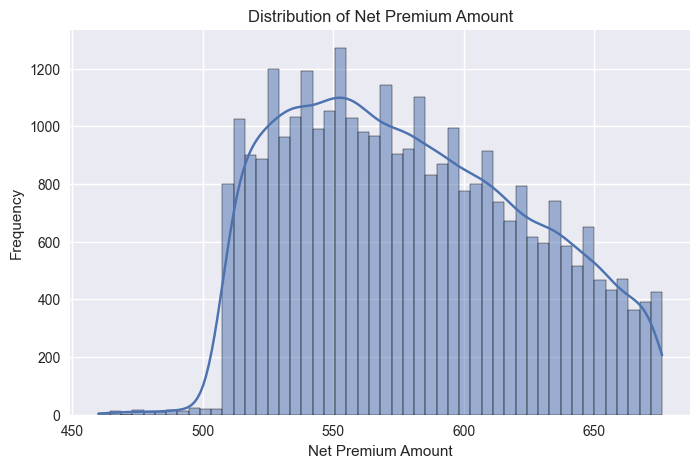

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df[target], bins=50, kde=True)
plt.title("Distribution of Net Premium Amount")
plt.xlabel("Net Premium Amount")
plt.ylabel("Frequency")
plt.show()

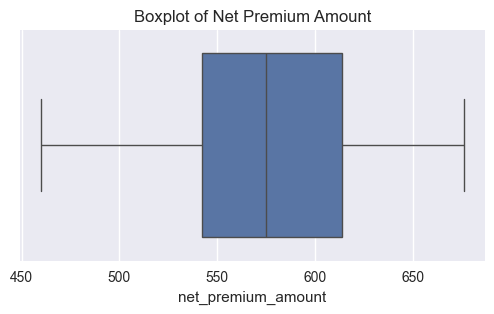

In [14]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df[target])
plt.title("Boxplot of Net Premium Amount")
plt.show()

In [15]:
df[target].skew()

np.float64(0.2877961142027823)

****Target Variable Analysis Summary/Interpretation**

The target variable `net_premium_amount` shows a relatively stable and 
well-controlled distribution with a mild right skew (skewness ≈ 0.29). 
No extreme outliers are observed based on boxplot analysis.

The narrow range and limited variance of premium values support the use of 
MAE as the primary evaluation metric, as prediction errors can be directly 
interpreted in monetary terms. RMSE will be monitored as a secondary metric 
to account for potential high-cost mispricing cases.

Overall, the distribution suggests that linear regression-based models are 
a reasonable baseline for initial experimentation.

## 4. Data Quality Assessment
- Missing values
- Potential outliers
- Data consistency checks

In [16]:
missing_summary = (
    df.isna()
      .sum()
      .to_frame(name="missing_count")
      .assign(missing_ratio=lambda x: x["missing_count"] / len(df))
      .sort_values("missing_ratio", ascending=False)
)

missing_summary

,missing_count,missing_ratio
lapsed_date,19569,0.608943
prefix,10791,0.335792
vehicle_length,685,0.021316
vehicle_fuel_type,78,0.002427
last_name,20,0.000622
total_claims_number_ratio,0,0.000000
lapsed_policies,0,0.000000
payment_method,0,0.000000
net_premium_amount,0,0.000000
total_claims_cost_in_current_year,0,0.000000


Data Cleaning & Missing Value Analysis
Below is the summary of my findings and the proposed actions for the missing data:

1. lapsed_date (Missing: 60.9%)

**Analysis**: The high missing ratio suggests that these values are not "missing at random." Instead, they likely represent active customers. A date is only recorded when a policy has "lapsed" (ended).

**Action**: Keep this column but treat the missing values as a specific category (e.g., "Active").

2. prefix (Missing: 33.6%)

**Analysis**: While it may not be a reliable indicator of gender due to the high missing rate, it contains valuable professional titles (e.g., Dr., Prof.).

**Action**: Retain for Feature Engineering. These titles can be used to infer the socio-economic status or occupation of the customer.(if it need. But this could be noise)

3. vehicle_length & vehicle_fuel_type (Missing: < 2.2%)

**Analysis**: The percentage of missingness is minimal. Removing these rows will not significantly bias the overall dataset.

**Action**: Drop these rows to maintain data quality. Alternatively, if more data is required, these values could be imputed based on the vehicle's make and model.

4. last_name (Missing: 0.06%)

**Analysis**: The missing count is negligible. However, this column contains PII (Personally Identifiable Information), which is not suitable for model training.

**Action**: Drop the column entirely to ensure data privacy and prevent the model from overfitting on individual names.


In [17]:
# with pd.option_context('display.max_columns', None):
#     display(df.head(10))

In [18]:
# num_cols = df.select_dtypes(include=["number"]).columns
# cat_cols = df.select_dtypes(exclude=["number"]).columns

# missing_summary.loc[num_cols].head(), missing_summary.loc[cat_cols].head()

# "Before proceeding, it is necessary to ensure that each feature is cast to the appropriate data type."

**Data Quality & Privacy Decisions**

- PII columns (e.g., names, contact details, addresses) will not be used for modeling.
- Date columns will be transformed into derived numerical features in the preparation phase.
- Columns with high missing ratios will be evaluated for exclusion or imputation based on business relevance.

**Next Steps (Data Preparation)**

- Drop PII and non-informative identifiers
- Engineer age- and tenure-related features from date columns
- Handle missing values based on feature type
- Encode categorical variables
- Prepare train/validation-ready datasets

## 5. Hypothesis-Driven Analysis

### 5.1 Vehicle-related Features vs Premium


*Hypothesis 1*

Vehicle-related features have a stronger impact on premium pricing than demographic features.

*Hypothesis 2*

Customers with higher historical claim amounts tend to pay higher insurance premiums.

In [19]:
df_eda = df.copy()

In [20]:
df_eda["birth_date"] = pd.to_datetime(df_eda["birth_date"])
df_eda["driving_license_date"] = pd.to_datetime(df_eda["driving_license_date"])

In [21]:
# info_as_df = pd.DataFrame({
#     "Column": df.columns,
#     "Non-Null Count": df.count().values,
#     "Dtype": df.dtypes.values
# })

# with pd.option_context('display.max_rows', None):
#     display(info_as_df)

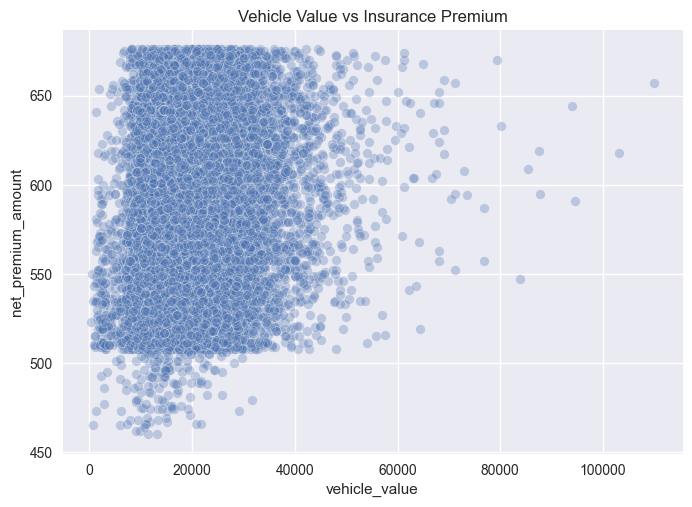

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df_eda,
    x="vehicle_value",
    y="net_premium_amount",
    alpha=0.3
)
plt.title("Vehicle Value vs Insurance Premium")
plt.show()

The scatter plot indicates a positive relationship between vehicle value and
insurance premium. However, the wide dispersion suggests that vehicle value
alone is not sufficient to explain premium variation, implying the influence
of additional risk factors.

### 5.2 Claims History vs Premium
- Number of claims
- Total claim cost
- Claim frequency ratio

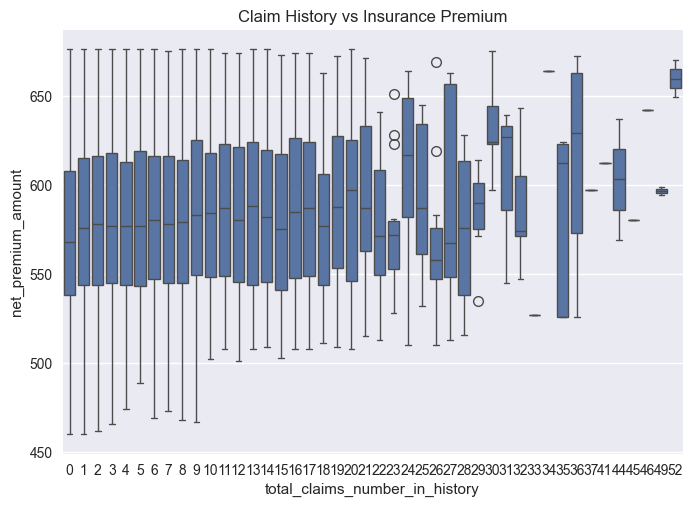

In [23]:
sns.boxplot(
    data=df_eda,
    x="total_claims_number_in_history",
    y="net_premium_amount"
)
plt.title("Claim History vs Insurance Premium")
plt.show()

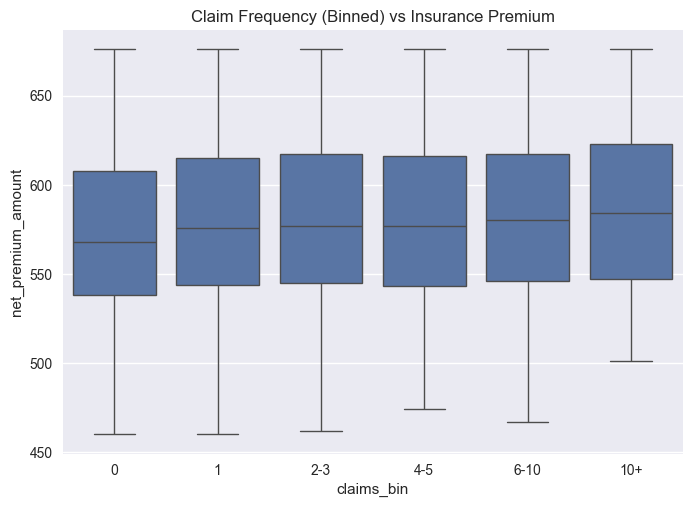

In [24]:
df_eda["claims_bin"] = pd.cut(
    df_eda["total_claims_number_in_history"],
    bins=[-1, 0, 1, 3, 5, 10, 100],
    labels=["0", "1", "2-3", "4-5", "6-10", "10+"]
)

sns.boxplot(
    data=df_eda,
    x="claims_bin",
    y="net_premium_amount"
)
plt.title("Claim Frequency (Binned) vs Insurance Premium")
plt.show()

While an increasing trend can be observed between claim frequency and premium,
the relationship appears weak and noisy. This suggests that claim severity
(total claim cost) may be a more informative risk indicator than claim count alone.

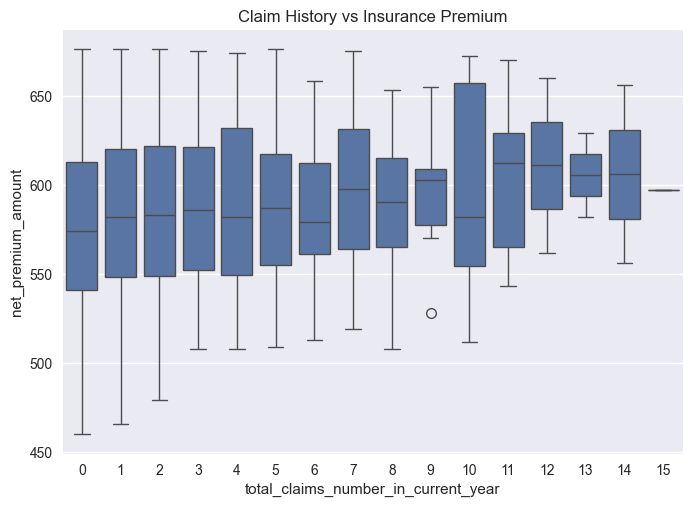

In [25]:
sns.boxplot(
    data=df_eda,
    x="total_claims_number_in_current_year",
    y="net_premium_amount"
)
plt.title("Claim History vs Insurance Premium")
plt.show()

The boxplot shows a gradual increase in median insurance premiums as the number
of claims increases. However, the wide dispersion within each category indicates
that claim frequency alone does not strongly determine premium levels.

This suggests that claim history contributes to pricing decisions, but its effect
is likely moderated by other risk factors.

### 5.3 Vehicle-related Features & Claims History vs Premium
- Number of claims
- Total claim cost
- Claim frequency ratio

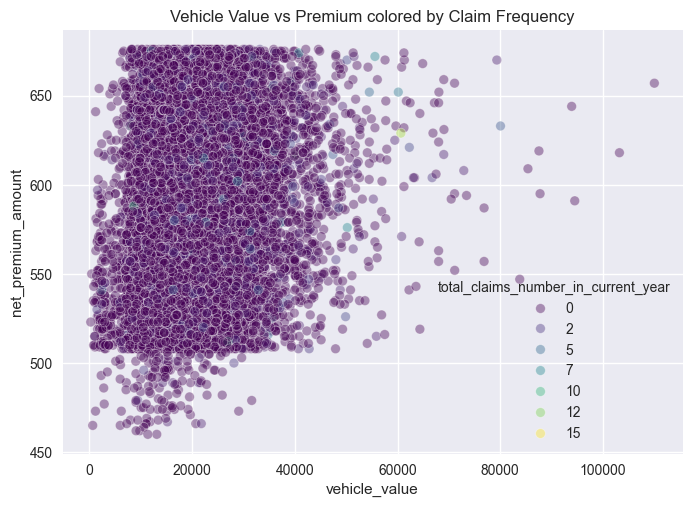

In [26]:
sns.scatterplot(
    data=df_eda,
    x="vehicle_value",
    y="net_premium_amount",
    hue="total_claims_number_in_current_year",
    palette="viridis",
    alpha=0.4
)
plt.title("Vehicle Value vs Premium colored by Claim Frequency")
plt.show()

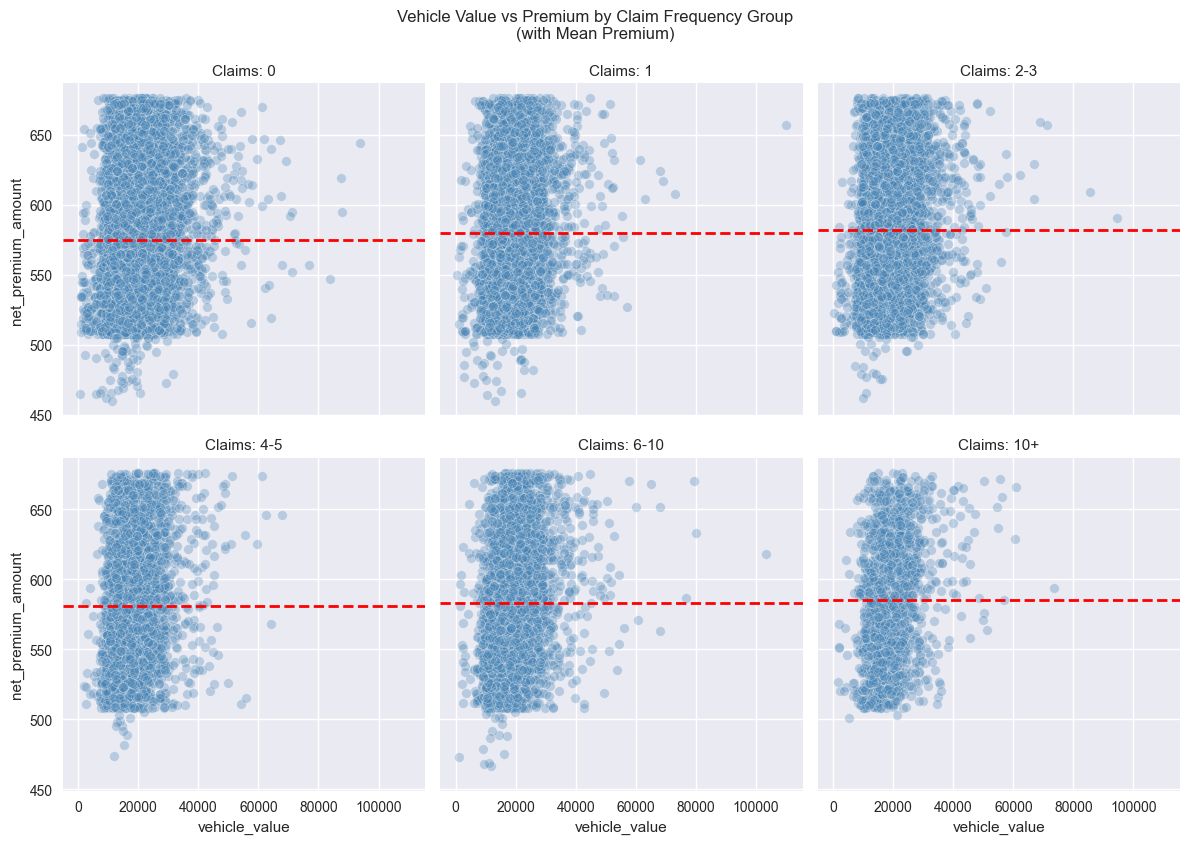

In [27]:
g = sns.FacetGrid(
    df_eda,
    col="claims_bin",
    col_wrap=3,
    height=4,
    sharex=True,
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x="vehicle_value",
    y="net_premium_amount",
    alpha=0.3,
    color="steelblue"
)

for ax, bin_label in zip(g.axes.flatten(), df_eda["claims_bin"].cat.categories):
    mean_premium = (
        df_eda[df_eda["claims_bin"] == bin_label]["net_premium_amount"]
        .mean()
    )
    ax.axhline(
        mean_premium,
        color="red",
        linestyle="--",
        linewidth=2,
        label="Mean Premium"
    )
    
g.set_titles("Claims: {col_name}")
g.figure.suptitle(
    "Vehicle Value vs Premium by Claim Frequency Group\n(with Mean Premium)",
    y=1.05
)

plt.show()

By adding the mean premium line, we observe that while the relationship between
vehicle value and premium remains consistent across claim frequency groups,
the overall premium level increases slightly for customers with higher claim
frequency. This suggests that claim history influences pricing primarily through
baseline adjustments rather than structural changes.

## 6. Feature Selection Considerations


Feature selection will be further refined during the modeling phase
based on model performance and regularization effects.

### 6.1 Features to Include
- Vehicle-related numerical features (vehicle_value, horsepower, weight)
- Claim frequency indicators (current year and historical)
- Policy-related attributes (policy_type, second_driver)
- Derived temporal features (vehicle age, customer age, driving experience)

### 6.2 Features to Exclude
- Personally identifiable information (names, contact details, addresses)
- Unique identifiers (customer_id)
- Raw date fields (to be transformed into numerical features)


### 6.3 Rationale for Exclusion
- PII features provide no generalizable predictive value and pose privacy risks
- Identifier fields may lead to overfitting without improving model performance
- Raw dates are not directly interpretable by most ML models

## 7. EDA Summary and Next Steps


### 7.1 Key Findings
- Vehicle-related features, particularly vehicle value, show a consistent and
  interpretable positive relationship with insurance premium amounts.
- Claim frequency exhibits a weak but stable positive association with premiums,
  while claim severity (total claim cost) alone does not strongly explain pricing.
- Visual analysis indicates that no single feature can sufficiently explain
  premium variation, highlighting the need for multivariate modeling.
- Claim-related features appear to influence premium levels mainly through
  baseline adjustments rather than structural changes in pricing behavior.

### 7.2 Implications for Data Preparation
- Remove personally identifiable information and non-informative identifiers
- Transform date variables into meaningful numerical features such as customer
  age, vehicle age, and driving experience
- Handle missing values according to their business meaning identified during EDA
- Encode categorical variables to ensure compatibility with machine learning models
- Prepare clean, model-ready datasets for training and validation

### 7.3 Recommendations for Modeling
- Regularized linear models (Ridge and Lasso) should be used as interpretable
  baselines to handle multicollinearity and assess feature relevance.
- (A non-linear model such as KNN regression should be evaluated to capture
  potential interactions not visible in linear models.)
- Mean Absolute Error (MAE) will be used as the primary evaluation metric to
  align model performance with business interpretability.

#### This concludes the exploratory data analysis phase. The following notebook focuses on data preparation and feature engineering based on the insights obtained from this EDA.